<a href="https://colab.research.google.com/github/WENDELLDELIMA/Mestrado_Mackenzie/blob/main/Aprendizado_de_Maquina_Mestrado_em_Computa%C3%A7%C3%A3o_Aplicada_ATIVIDADE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌱 Análise de Viabilidade Econômica e Ambiental com Árvores de Decisão  
### Amortização da Perda Comercial através da Comercialização de Créditos de Carbono  

### 📌 Atividade – Aprendizado de Máquina  
**Mestrado Profissional em Computação Aplicada – Mackenzie**  
Professor: **Leandro Augusto**  
Aluno: **Wendell Lima**  

Este trabalho utiliza técnicas de **Ciência de Dados** e **Aprendizado de Máquina** para investigar a viabilidade da produção de papel reciclado sob uma ótica **econômica e ambiental integrada**.  

A proposta consiste em avaliar se os ganhos potenciais com a comercialização de **créditos de carbono evitados** podem **compensar ou amortizar as perdas comerciais** decorrentes de diferentes formatos de produção.  

---

## 🎯 Objetivos da Análise

- 📉 **Mensurar perdas comerciais** (por receita e formato).  
- 🌍 **Calcular créditos de carbono evitados** (potencial de receita ambiental).  
- ✅ **Classificar formatos como viáveis ou inviáveis**, considerando a compensação mínima de 80% das perdas.  
- 🌳 **Aplicar modelos de Aprendizado de Máquina** (Árvore de Decisão e KNN) para identificar padrões e apoiar a tomada de decisão.  
- 📊 **Explorar visualizações analíticas** para compreensão dos resultados e explicabilidade do modelo.  

---

## 🌍 Conexão entre Sustentabilidade e Dados
O trabalho conecta **sustentabilidade** e **ciência de dados**, propondo uma abordagem prática para a **tomada de decisão em ambientes industriais**, alinhando **eficiência econômica** e **impacto ambiental positivo**.  


In [225]:
#importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [207]:
# Carregar a base RSU_APARAS - DATASET da Receita de Residuos Solidos Urbanos coletados para reciclagem
rsu = pd.read_excel("RSU_APARAS.xlsx", sheet_name="Sheet")


In [208]:
# Ver as primeiras linhas
display(rsu.head())

,Id Receita,Código,Descrição,Qtd. Base,Unid.,Coeficiente,%,Qtd. Consumo,Grupo,Preço Unit.,Custo Total,Retorno/Refugo,Observações,Desc. Receita,Nome,Status,Id Orçamento,Id Insumo,C. Resultado
0,747,376,APARAS ONDULADO II - POS CONSUMO,1000,KG,1.14,43,490.2,MATERIA PRIMA - APARAS,1.4145,693.38790,verdadeiro,NaN,DUO CAPA COMUM,NaN,A,NaN,531,374
1,747,2442,APARAS ONDULADO I - POS CONSUMO,1000,KG,1.14,50,570.0,MATERIA PRIMA - APARAS,1.4609,832.71300,verdadeiro,NaN,DUO CAPA COMUM,NaN,A,NaN,2884,574
2,743,376,APARAS ONDULADO II - POS CONSUMO,1000,KG,1.14,43,490.2,MATERIA PRIMA - APARAS,1.0944,536.47488,verdadeiro,NaN,DUO SIZE CAPA,NaN,R,NaN,531,374
3,743,2442,APARAS ONDULADO I - POS CONSUMO,1000,KG,1.14,50,570.0,MATERIA PRIMA - APARAS,1.2001,684.05700,verdadeiro,NaN,DUO SIZE CAPA,NaN,R,NaN,2884,574
4,742,2442,APARAS ONDULADO I - POS CONSUMO,1000,KG,1.14,38,433.2,MATERIA PRIMA - APARAS,1.1523,499.17636,verdadeiro,NaN,DUO SIZE KFT EX,NaN,A,NaN,2884,574


## 📊 Exploração inicial do Dataset `RSU_APARAS`

O dataset utilizado neste trabalho é a base **RSU_APARAS**, que contém as informações sobre o consumo de aparas (papel reciclado pós-consumo) em diferentes receitas de papel fabricado.  
Cada linha representa a relação entre **uma receita de papel** e **os insumos de aparas utilizados para produzi-la**.

### 🔑 Estrutura das colunas principais

- **Id Receita** → Identificador único da receita de papel fabricado.  
- **Código** → Código interno da apara (insumo).  
- **Descrição** → Nome do insumo (ex: *Aparas Ondulado I, II, III – Pós Consumo*).  
- **Qtd. Base** → Quantidade de referência (1000 kg).  
- **Unid.** → Unidade de medida (KG).  
- **Coeficiente** → Fator de conversão para cálculo do consumo real.  
- **%** → Percentual de participação da apara na receita.  
- **Qtd. Consumo** → Quantidade efetivamente consumida (em kg).  
- **Preço Unit.** → Custo unitário da apara (R$/kg).  
- **Custo Total** → Valor gasto com a apara na receita.  
- **Retorno/Refugo** → Indica se há aproveitamento ou se trata de refugo.  
- **Desc. Receita** → Nome da receita de papel resultante (ex: *DUO CAPA COMUM, DUO SIZE CAPA*).  
- **Status** → Situação da receita (ex.: Ativa, Reprovada).  
- **Id Insumo** → Identificador interno do insumo no sistema.  
- **C. Resultado** → Referência contábil/resultado vinculada ao insumo.  

### 📌 Exemplo interpretativo

Na receita **747 – DUO CAPA COMUM**, observa-se:  
- Uso de **Aparas Ondulado II (570 kg)** e **Aparas Ondulado I (490,2 kg)**;  
- Custos de **R$ 832,71** e **R$ 693,38** respectivamente;  
- Totalizando o custo do insumo para aquela produção específica.  

### 🎯 Importância para o projeto

Este dataset permite:  
1. **Calcular os custos de produção de cada receita de papel**.  
2. **Associar os fatores de carbono evitado por tipo de apara** (ex.: 700 kg CO₂e/t para Aparas Ondulado I).  
3. **Comparar custos das aparas com créditos de carbono gerados**, criando métricas de viabilidade econômica e ambiental.  
4. **Servir de base para classificação binária**, aplicando algoritmos de Aprendizado de Máquina (ex.: Árvore de Decisão, KNN) para determinar se uma receita é **viável ou inviável** considerando custos e benefícios ambientais.

---


In [212]:
# Criando um Dataset resumido apenas com as informações de Receita e o quanto ela consome pelo IDreceita
aparas = rsu[["Id Receita","Desc. Receita","Descrição","Qtd. Consumo","Custo Total"]].copy()
print(aparas)

    Id Receita         Desc. Receita                          Descrição  \
0          747        DUO CAPA COMUM   APARAS ONDULADO II - POS CONSUMO   
1          747        DUO CAPA COMUM    APARAS ONDULADO I - POS CONSUMO   
2          743         DUO SIZE CAPA   APARAS ONDULADO II - POS CONSUMO   
3          743         DUO SIZE CAPA    APARAS ONDULADO I - POS CONSUMO   
4          742       DUO SIZE KFT EX    APARAS ONDULADO I - POS CONSUMO   
5          742       DUO SIZE KFT EX   APARAS ONDULADO II - POS CONSUMO   
6          741     DUO SIZE WHITE EX   APARAS ONDULADO II - POS CONSUMO   
7          741     DUO SIZE WHITE EX    APARAS ONDULADO I - POS CONSUMO   
8          740           UNI SIZE EX   APARAS ONDULADO II - POS CONSUMO   
9          740           UNI SIZE EX    APARAS ONDULADO I - POS CONSUMO   
10         740           UNI SIZE EX  APARAS ONDULADO III - POS CONSUMO   
11         739       DUO SIZE REC EX    APARAS ONDULADO I - POS CONSUMO   
12         739       DUO 

## 🌱 Fatores de Carbono Evitado (kgCO₂e/t)

Para cada tonelada de apara coletada e utilizada como insumo, considera-se que há uma **redução nas emissões de gases de efeito estufa** (CO₂ equivalente) em comparação à produção de papel a partir de fibras virgens.

Os coeficientes adotados neste estudo são baseados em literatura técnica e referências internacionais:

- **Aparas Ondulado I – Pós Consumo** → 700 kgCO₂e evitados por tonelada.  
- **Aparas Ondulado II – Pós Consumo** → 575 kgCO₂e evitados por tonelada.  
- **Aparas Ondulado III – Pós Consumo** → 425 kgCO₂e evitados por tonelada.  

### 🔎 Interpretação
Isso significa, por exemplo, que ao utilizar **1 tonelada de Apara Ondulado I** na produção, evita-se a emissão de **0,7 tCO₂e** que ocorreria na fabricação com fibras virgens.

---

### 📚 Fontes e Referências

- **DEFRA (UK Department for Environment, Food & Rural Affairs)**  
  Estimativas de emissões evitadas pelo uso de papel reciclado em comparação com fibras virgens.  
  [DEFRA Carbon Factors](https://www.gov.uk/government/collections/government-conversion-factors-for-company-reporting)

- **SciELO Brasil**  
  Estudos acadêmicos sobre reciclagem de papel e benefícios ambientais em indústrias brasileiras.  
  Ex.: *Avaliação de Ciclo de Vida de Papel Reciclado no Brasil* – SciELO.  

- **IPCC (Painel Intergovernamental de Mudanças Climáticas)**  
  Relatórios de metodologia para cálculo de emissões evitadas em processos industriais.  
  [IPCC Guidelines for National Greenhouse Gas Inventories](https://www.ipcc-nggip.iges.or.jp/public/2006gl/)

- **Literatura internacional de LCA (Life Cycle Assessment)**  
  Revisões apontam que a reciclagem de papel evita entre **40% e 60% das emissões** comparado à produção de papel virgem.  
  (McDevitt & Grigsby, *Journal of Cleaner Production*, 2014).

---

### 🛠 Aplicação no Trabalho
Esses fatores serão aplicados no cálculo de:
1. **Carbono evitado total por receita**.  
2. **Potencial de receita em créditos de carbono**, considerando o valor médio do mercado voluntário (≈ R$ 65,00/tCO₂e).  
3. **Análise de viabilidade**, comparando custo das aparas × créditos de carbono gerados.


In [198]:
# kgCO2e evitados por tonelada coletada de RSU
fatores = {
    "APARAS ONDULADO I - POS CONSUMO": 700,
    "APARAS ONDULADO II - POS CONSUMO": 575,
    "APARAS ONDULADO III - POS CONSUMO": 425
}

In [213]:
# Unindo os Fatores Mapeados as receitas de papeis que temos no DS aparas
aparas["fator_CO2_ton"] = aparas["Descrição"].map(fatores)

# Também em toneladas (tCO2e)
aparas["Fator_CO2_kg"] = (aparas["fator_CO2_ton"] / 1000) * aparas["Qtd. Consumo"]

display(aparas.head())



,Id Receita,Desc. Receita,Descrição,Qtd. Consumo,Custo Total,fator_CO2_ton,Fator_CO2_kg
0,747,DUO CAPA COMUM,APARAS ONDULADO II - POS CONSUMO,490.2,693.38790,575,281.865
1,747,DUO CAPA COMUM,APARAS ONDULADO I - POS CONSUMO,570.0,832.71300,700,399.000
2,743,DUO SIZE CAPA,APARAS ONDULADO II - POS CONSUMO,490.2,536.47488,575,281.865
3,743,DUO SIZE CAPA,APARAS ONDULADO I - POS CONSUMO,570.0,684.05700,700,399.000
4,742,DUO SIZE KFT EX,APARAS ONDULADO I - POS CONSUMO,433.2,499.17636,700,303.240


## 📊 Distribuição Percentual de Aparas por Tipo de Papel

O gráfico acima mostra a **composição percentual de aparas** utilizadas em cada tipo de papel (receita).  
Foram consideradas três categorias principais de aparas:

- **Aparas Ondulado I – Pós Consumo** (alta qualidade).  
- **Aparas Ondulado II – Pós Consumo** (qualidade média).  
- **Aparas Ondulado III – Pós Consumo** (qualidade baixa).  

### 🔎 Interpretação
- Cada barra representa uma **receita de papel**.  
- As cores dentro da barra indicam a **proporção de cada tipo de apara** usada naquela receita.  
- É possível observar que algumas receitas dependem quase exclusivamente de **Apara Ondulado II**, enquanto outras apresentam uma **mistura entre tipos I e II**.  
- O uso de **Apara Ondulado III** é pouco significativo, aparecendo em proporções reduzidas (faixa amarela).

### 🎯 Importância
Essa análise permite:
1. **Avaliar a sustentabilidade**: receitas que utilizam mais **Apara I** tendem a gerar maior crédito de carbono, já que possuem coeficiente mais elevado (700 kgCO₂e/t).  
2. **Comparar padrões de produção**: identificar quais receitas têm **maior diversidade de aparas** e quais são mais dependentes de um único tipo.  
3. **Auxiliar na tomada de decisão**: otimizar a escolha das aparas com base em custo, disponibilidade e impacto ambiental.


<Figure size 1400x700 with 0 Axes>

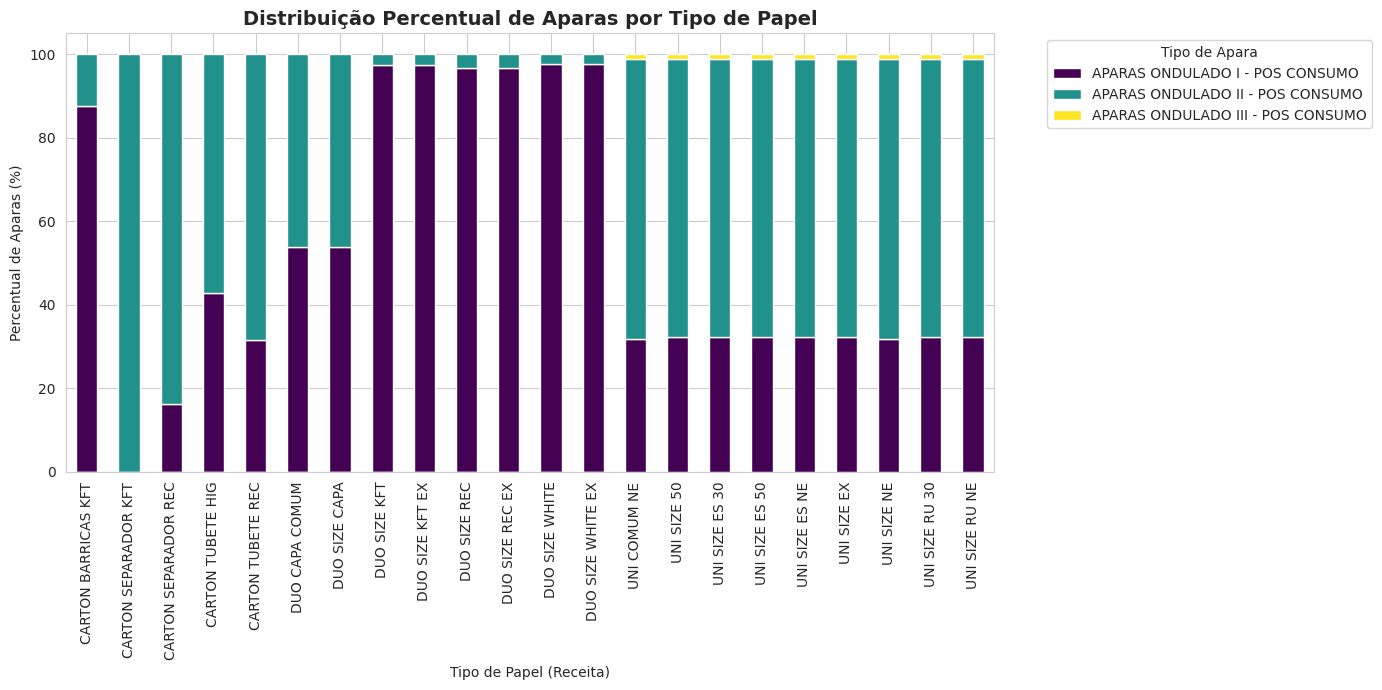

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primeiro: agrupar consumo por tipo de papel e tipo de apara
aparas_dist = aparas.groupby(["Desc. Receita", "Descrição"])["Qtd. Consumo"].sum().reset_index()

# Calcular percentual dentro de cada receita
aparas_dist["Percentual"] = aparas_dist.groupby("Desc. Receita")["Qtd. Consumo"].transform(lambda x: (x / x.sum()) * 100)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(14,7))
aparas_pivot = aparas_dist.pivot(index="Desc. Receita", columns="Descrição", values="Percentual").fillna(0)

aparas_pivot.plot(kind="bar", stacked=True, figsize=(14,7), colormap="viridis")

plt.title("Distribuição Percentual de Aparas por Tipo de Papel", fontsize=14, weight="bold")
plt.xlabel("Tipo de Papel (Receita)")
plt.ylabel("Percentual de Aparas (%)")
plt.legend(title="Tipo de Apara", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [215]:
# Agrupar por Id Receita e Descrição da Receita
rsu_grouped = aparas.groupby(["Id Receita","Desc. Receita"]).agg({
    "Qtd. Consumo": "sum",
    "Custo Total": "sum",
    "Fator_CO2_kg": "sum"
}).reset_index()

# Conferir resultado
display(rsu_grouped.head(10))


,Id Receita,Desc. Receita,Qtd. Consumo,Custo Total,Fator_CO2_kg
0,620,UNI SIZE NE,1071.6,1530.84672,657.210
1,653,DUO SIZE REC,1060.2,1547.25930,737.865
2,710,CARTON TUBETE HIG,798.0,884.24100,501.600
3,715,UNI SIZE ES NE,1060.2,1514.72142,650.655
4,722,UNI SIZE ES 50,1060.2,1514.72142,650.655
5,723,UNI SIZE 50,1060.2,1169.15094,650.655
6,728,CARTON TUBETE REC,1083.0,1190.58750,665.475
7,730,UNI SIZE RU 30,1060.2,1367.47902,650.655
8,731,UNI SIZE ES 30,1060.2,1514.72142,650.655
9,732,UNI SIZE RU NE,1060.2,1514.72142,650.655


/tmp/ipython-input-2939612353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


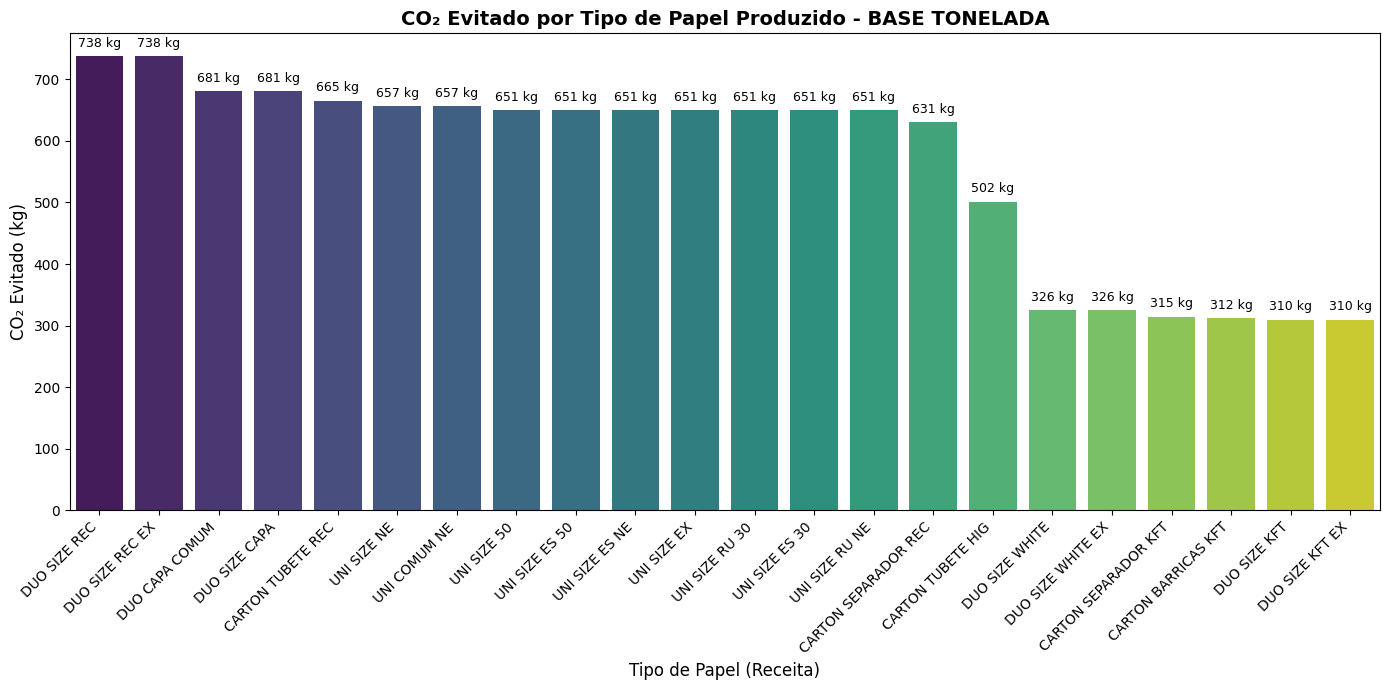

In [ ]:
# Ordenar receitas pelo total de CO2 evitado
rsu_sorted = rsu_grouped.sort_values("Fator_CO2_kg", ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(
    data=rsu_sorted,
    x="Desc. Receita",
    y="Fator_CO2_kg",
    palette="viridis"
)

# Títulos e rótulos
plt.title("CO₂ Evitado por Tipo de Papel Produzido - BASE TONELADA", fontsize=14, weight="bold")
plt.xlabel("Tipo de Papel (Receita)", fontsize=12)
plt.ylabel("CO₂ Evitado (kg)", fontsize=12)

# Rotacionar nomes no eixo X
plt.xticks(rotation=45, ha="right")

# Adicionar valores em cima das barras
for i, val in enumerate(rsu_sorted["Fator_CO2_kg"]):
    plt.text(i, val + 10, f"{val:,.0f} kg", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

In [217]:
rsu_grouped["tCO2_ev"] = rsu_grouped["Fator_CO2_kg"] / 1000


In [218]:
preco_credito = 120  # R$/tCO2

rsu_grouped["Credito_R$"] = rsu_grouped["tCO2_ev"] * preco_credito


In [219]:
display(rsu_grouped[["Id Receita","Desc. Receita","tCO2_ev","Credito_R$"]].head(10))


,Id Receita,Desc. Receita,tCO2_ev,Credito_R$
0,620,UNI SIZE NE,0.657210,78.8652
1,653,DUO SIZE REC,0.737865,88.5438
2,710,CARTON TUBETE HIG,0.501600,60.1920
3,715,UNI SIZE ES NE,0.650655,78.0786
4,722,UNI SIZE ES 50,0.650655,78.0786
5,723,UNI SIZE 50,0.650655,78.0786
6,728,CARTON TUBETE REC,0.665475,79.8570
7,730,UNI SIZE RU 30,0.650655,78.0786
8,731,UNI SIZE ES 30,0.650655,78.0786
9,732,UNI SIZE RU NE,0.650655,78.0786


## 💰 Receita Potencial em Créditos de Carbono por Receita (por tonelada)

O gráfico apresenta a **receita estimada em créditos de carbono** que cada tipo de papel (receita) pode gerar, considerando o potencial de abatimento de CO₂ das aparas utilizadas.

### 🔎 Interpretação
- As barras representam o **valor médio em R$ por tonelada** de cada receita.  
- Algumas receitas, como as primeiras à esquerda, geram maior potencial de crédito de carbono (acima de **R$ 85/t**).  
- Outras receitas ficam em patamares mais baixos (**R$ 76–79/t**), refletindo o uso de aparas de menor coeficiente de abatimento.  

### 🎯 Importância
Esse resultado mostra **quais receitas são mais atrativas economicamente** dentro do mercado de créditos de carbono.  
Receitas que utilizam **Apara Ondulado I** tendem a gerar maior retorno, enquanto aquelas que dependem mais de **Apara III** têm menor potencial.


/tmp/ipython-input-4100671776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


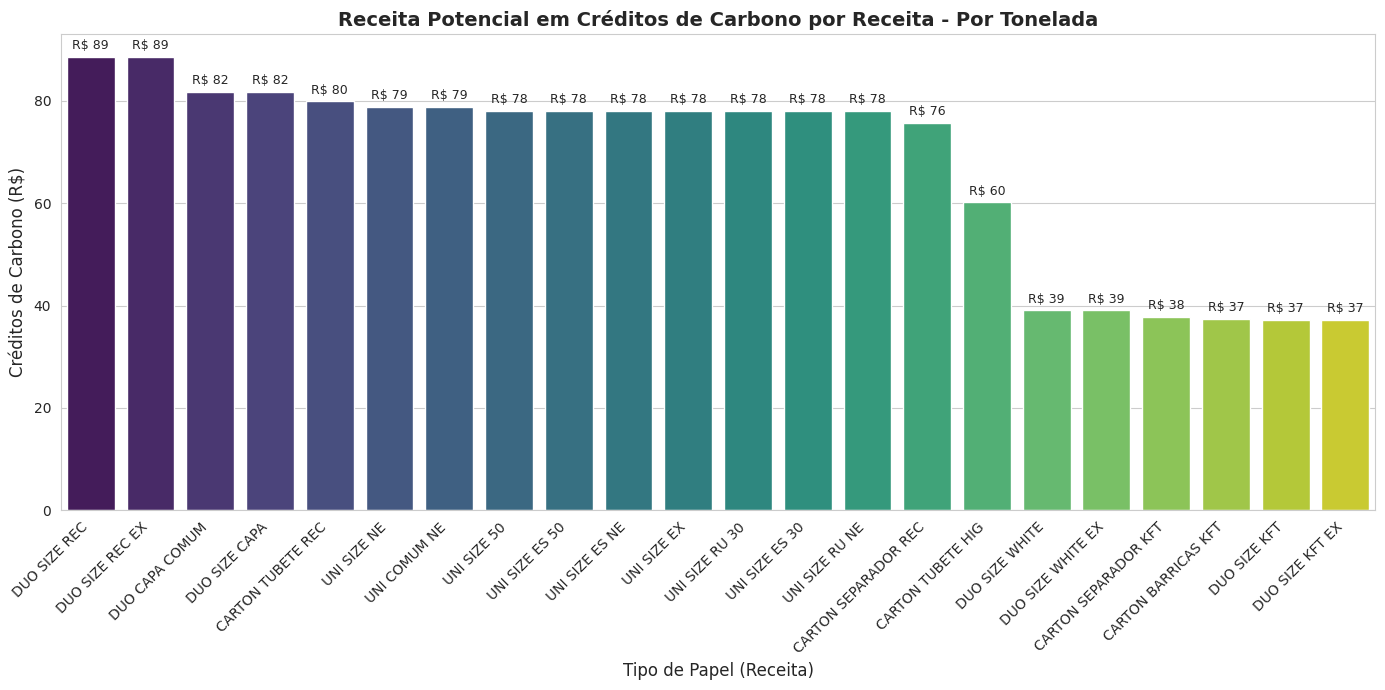

In [220]:
# Ordenar pela maior receita em créditos
rsu_sorted = rsu_grouped.sort_values("Credito_R$", ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(
    data=rsu_sorted,
    x="Desc. Receita",
    y="Credito_R$",
    palette="viridis"
)

# Título e rótulos
plt.title("Receita Potencial em Créditos de Carbono por Receita - Por Tonelada", fontsize=14, weight="bold")
plt.xlabel("Tipo de Papel (Receita)", fontsize=12)
plt.ylabel("Créditos de Carbono (R$)", fontsize=12)

# Rotacionar os nomes no eixo X
plt.xticks(rotation=45, ha="right")

# Mostrar valores em cima das barras
for i, val in enumerate(rsu_sorted["Credito_R$"]):
    plt.text(i, val + (0.01 * rsu_sorted["Credito_R$"].max()),
             f"R$ {val:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

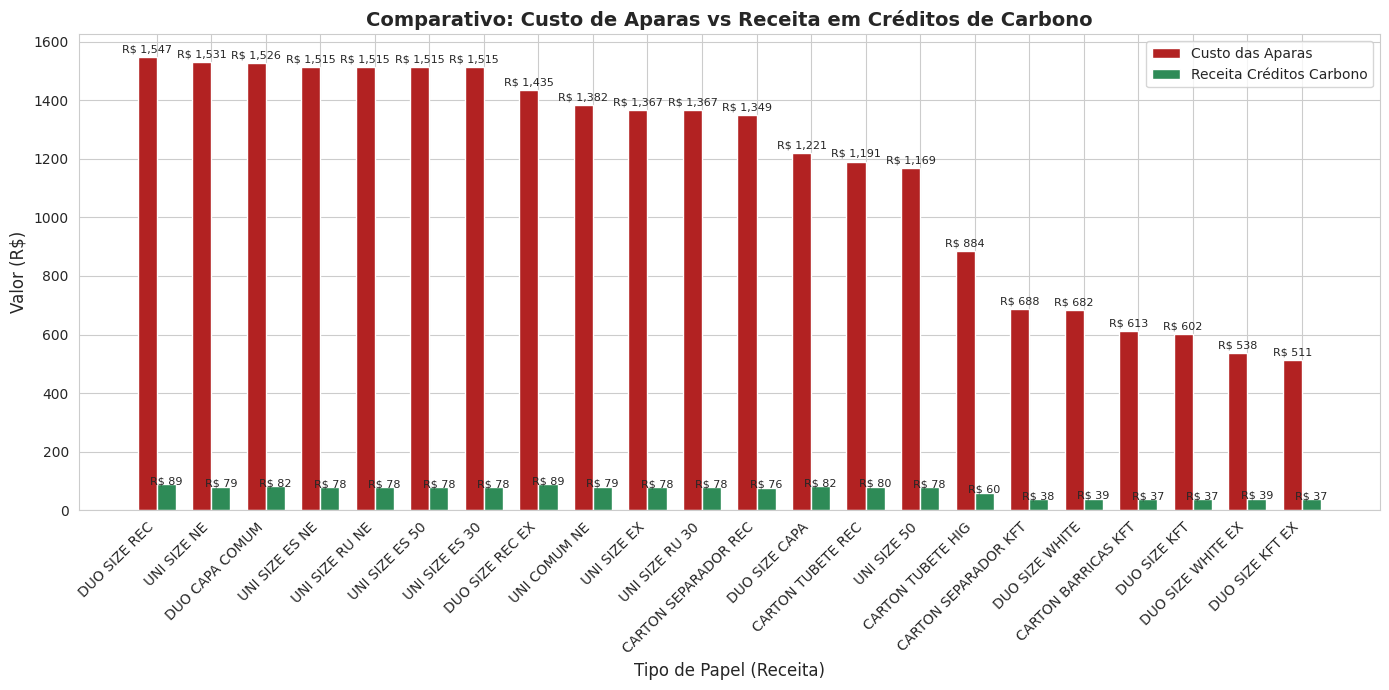

In [128]:
import numpy as np

# Ordenar pelo maior custo de aparas
rsu_sorted = rsu_grouped.sort_values("Custo Total", ascending=False)

# Configurar posições no eixo
x = np.arange(len(rsu_sorted))
largura = 0.35

plt.figure(figsize=(14,7))

# Barras para custo total
plt.bar(x - largura/2, rsu_sorted["Custo Total"], largura, label="Custo das Aparas", color="firebrick")

# Barras para receita de créditos
plt.bar(x + largura/2, rsu_sorted["Credito_R$"], largura, label="Receita Créditos Carbono", color="seagreen")

# Títulos e rótulos
plt.title("Comparativo: Custo de Aparas vs Receita em Créditos de Carbono", fontsize=14, weight="bold")
plt.xlabel("Tipo de Papel (Receita)", fontsize=12)
plt.ylabel("Valor (R$)", fontsize=12)

# Nomes no eixo X
plt.xticks(x, rsu_sorted["Desc. Receita"], rotation=45, ha="right")

# Legenda
plt.legend()

# Mostrar valores em cima das barras
for i, (custo, credito) in enumerate(zip(rsu_sorted["Custo Total"], rsu_sorted["Credito_R$"])):
    plt.text(i - largura/2, custo + (0.01 * rsu_sorted["Custo Total"].max()), f"R$ {custo:,.0f}", ha="center", fontsize=8)
    plt.text(i + largura/2, credito + (0.01 * rsu_sorted["Credito_R$"].max()), f"R$ {credito:,.0f}", ha="center", fontsize=8)

plt.tight_layout()
plt.show()


## 📦 Dataset de Estoque Reciclado

O dataset `ESTOQUE_RECICLADO.xlsx` contém informações detalhadas sobre os lotes de papel reciclado disponíveis no estoque da indústria.  

Ele possui **38 colunas** e mais de **170 mil registros**, fornecendo uma visão completa sobre cada bobina de papel armazenada.

### 🔑 Principais campos:
- **Id. Apo** → identificador único do apontamento no sistema.  
- **Status** → situação atual do lote (ex.: `DISPONÍVEL`, `PENDENTE`).  
- **Cliente** → cliente associado ao lote (ex.: *PENHA*, *BRAS ONDA*).  
- **Produto** → tipo de papel fabricado (ex.: `UNI COMUM NE`, `UNI SIZE NE`).  
- **Peso Bruto / Líquido / Pallet** → pesos em diferentes estágios do lote.  
- **Gramatura** → espessura do papel (em g/m²).  
- **Diâmetro** → diâmetro da bobina.  
- **Formato** → largura útil da bobina em milímetros.  
   - É a variável **mais importante do trabalho**, pois define o aproveitamento da produção.  
   - Formatos próximos ao limite (ex.: 2520 mm) apresentam menores perdas comerciais.  
   - Formatos menores podem gerar perdas, mas podem ser compensados por créditos de carbono.  
- **Qtd. Orig.** → quantidade original do lote.  
- **Origem** → modo de entrada no estoque (ex.: `APONTAMENTOPAPEL`).  
- **Id Receita** → ligação com a receita de produção usada.  

### 🎯 Importância
Esse dataset é fundamental para:
- Avaliar a **disponibilidade real de estoque reciclado**.  
- Conectar os lotes produzidos às receitas utilizadas.  
- Analisar o impacto do **Formato** na geração de perdas comerciais.  
- Relacionar perdas de estoque com **potenciais créditos de carbono**, verificando a viabilidade econômica e ambiental de cada formato.  


In [ ]:
# Ler estoque reciclado
estoque = pd.read_excel("ESTOQUE_RECICLADO.xlsx")

# Visualizar primeiras linhas
display(estoque.head())
print(estoque.info())

,Id. Apo,Status,Cliente,Sequencial,Produto,Peso Bruto,Peso Pallet,Peso Líquido,Gramatura,Diâmetro,...,Num. Pedido,Data Baixa Est.,Data Prev. Fat.,Entrada Conf.,Qtd Orig.,Origem,Local estoque,Id Programação,Id Ordem Carrega,Id Receita
0,1111360,PENDENTE,PENHA,30192,UNI COMUM NE,2026,0.0,2026.0,110,1300,...,11799.0,NaT,NaN,falso,2026.0,APONTAMENTOPAPEL,NaN,71042,NaN,738.0
1,1111359,DISPONIVEL,BRAS ONDA,456367,UNI SIZE NE,1191,0.0,1191.0,130,1300,...,11967.0,NaT,NaN,falso,1191.0,APONTAMENTOPAPEL,NaN,71170,NaN,620.0
2,1111358,DISPONIVEL,BRAS ONDA,456366,UNI SIZE NE,1286,0.0,1286.0,130,1300,...,11967.0,NaT,NaN,falso,1286.0,APONTAMENTOPAPEL,NaN,71170,NaN,620.0
3,1111357,DISPONIVEL,BRAS ONDA,456365,UNI SIZE NE,1107,0.0,1107.0,130,1300,...,11967.0,NaT,NaN,falso,1107.0,APONTAMENTOPAPEL,NaN,71170,NaN,620.0
4,1111356,DISPONIVEL,BRAS ONDA,456364,UNI SIZE NE,1197,0.0,1197.0,130,1300,...,11967.0,NaT,NaN,falso,1197.0,APONTAMENTOPAPEL,NaN,71170,NaN,620.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170255 entries, 0 to 170254
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Id. Apo           170255 non-null  int64         
 1   Status            170255 non-null  object        
 2   Cliente           170255 non-null  object        
 3   Sequencial        170255 non-null  int64         
 4   Produto           170255 non-null  object        
 5   Peso Bruto        170255 non-null  int64         
 6   Peso Pallet       170255 non-null  float64       
 7   Peso Líquido      170255 non-null  float64       
 8   Gramatura         170255 non-null  int64         
 9   Diâmetro          170255 non-null  int64         
 10  Formato           170255 non-null  object        
 11  Turno             169747 non-null  object        
 12  Data Prod.        170255 non-null  datetime64[ns]
 13  Data Entrega      0 non-null       float64       
 14  Data

## 📏 Simulação de Formatos e Cálculo de Perda Comercial

Para avaliar a viabilidade de cada bobina em termos de **formato** e **compensação com créditos de carbono**, foram feitas as seguintes etapas de pré-processamento:

1. **Seleção das colunas relevantes**  
   Do estoque, mantivemos apenas:
   - `Id Receita`
   - `Peso Líquido`
   - `Formato`
   - `Data Prod.`
   - `Preço Unit.`  

2. **Tratamento do Preço Unitário**  
   Valores iguais a zero foram substituídos pela **mediana** dos preços não nulos, evitando distorções no cálculo do custo.

3. **Geração de formatos simulados**  
   - O campo `Formato` foi preenchido com valores aleatórios **entre 2300 e 2520 mm**, intervalo real de corte das bobinas.  
   - O `Formato_util` foi fixado em **2520 mm**, que representa a largura máxima aproveitável sem perdas.

4. **Cálculo da Perda Comercial**  
   Foram criadas duas métricas:
   - `Perda_comercial_peso`: diferença em **kg de papel perdido** pela diferença entre o formato útil (2520) e o real da bobina.  
   - `Perda_comercial_valor`: valor financeiro perdido, multiplicando o peso perdido pelo preço unitário do papel.

📊 **Exemplo de resultado**:

| Id Receita | Peso Líquido | Formato | Preço Unit. | Perda_comercial_peso | Perda_comercial_valor |
|------------|-------------|---------|-------------|-----------------------|------------------------|
| 738        | 2026.0      | 2310    | 4.42        | 184.18                | 814.08                 |
| 620        | 1191.0      | 2325    | 4.50        | 99.89                 | 449.50                 |
| 620        | 1286.0      | 2495    | 4.50        | 12.88                 | 57.98                  |

---

### 🎯 Importância
Esse passo é crucial porque:
- Quantifica a **perda econômica real** ao usar formatos menores.  
- Cria a base para comparar se os **créditos de carbono gerados** são suficientes para **compensar** ou **amortizar** essas perdas.  
- Permite a construção de modelos de **árvore de decisão**, que avaliam quais formatos e receitas são **viáveis** em termos financeiros e ambientais.


In [157]:
# Copiar dataframe
estoque_limpo = estoque[["Id Receita","Peso Líquido", "Formato", "Data Prod.","Preço Unit."]].copy()

# Substituir Preço Unit. = 0 pela mediana dos valores não nulos e não-zero
mediana_preco = estoque_limpo.loc[estoque_limpo["Preço Unit."] > 0, "Preço Unit."].median()
estoque_limpo["Preço Unit."] = estoque_limpo["Preço Unit."].replace(0, mediana_preco)

# Criar coluna Formato aleatório (intervalo inteiro)
estoque_limpo["Formato"] = np.random.randint(2300, 2521, size=len(estoque_limpo))

# Formato útil fixo
estoque_limpo["Formato_util"] = 2520

# Calcular perdas comerciais
estoque_limpo["Perda_comercial_peso"] = (
    (estoque_limpo['Peso Líquido'] * (estoque_limpo["Formato_util"]/estoque_limpo["Formato"]))
    - estoque_limpo['Peso Líquido']
)

estoque_limpo["Perda_comercial_valor"] = estoque_limpo["Perda_comercial_peso"] * estoque_limpo["Preço Unit."]

estoque_limpo.head()


,Id Receita,Peso Líquido,Formato,Data Prod.,Preço Unit.,Formato_util,Perda_comercial_peso,Perda_comercial_valor
0,738.0,2026.0,2310,2025-09-14,4.42,2520,184.181818,814.083636
1,620.0,1191.0,2325,2025-09-14,4.50,2520,99.890323,449.506452
2,620.0,1286.0,2495,2025-09-14,4.50,2520,12.885772,57.985972
3,620.0,1107.0,2356,2025-09-14,4.50,2520,77.057725,346.759762
4,620.0,1197.0,2395,2025-09-14,4.50,2520,62.473904,281.132568


In [162]:
# Remover linhas com Id Receita nulo
estoque_limpo = estoque_limpo.dropna(subset=["Id Receita"])
rsu = rsu_grouped.dropna(subset=["Id Receita"])

# Garantir que estão como inteiros para fazer o merge - valores podem vir como string pois foram exportados de tabelas diferentes.
estoque_limpo["Id Receita"] = estoque_limpo["Id Receita"].astype(int)
rsu["Id Receita"] = rsu["Id Receita"].astype(int)

# Agora fazer o merge
merged_final = pd.merge(estoque_limpo, rsu, on="Id Receita", how="inner")

merged_final.head()


,Id Receita,Peso Líquido,Formato,Data Prod.,Preço Unit.,Formato_util,Perda_comercial_peso,Perda_comercial_valor,Desc. Receita,Qtd. Consumo,Custo Total,Fator_CO2_kg,tCO2_ev,Credito_R$
0,738,2026.0,2310,2025-09-14,4.42,2520,184.181818,814.083636,UNI COMUM NE,1071.6,1381.80312,657.21,0.65721,78.8652
1,620,1191.0,2325,2025-09-14,4.50,2520,99.890323,449.506452,UNI SIZE NE,1071.6,1530.84672,657.21,0.65721,78.8652
2,620,1286.0,2495,2025-09-14,4.50,2520,12.885772,57.985972,UNI SIZE NE,1071.6,1530.84672,657.21,0.65721,78.8652
3,620,1107.0,2356,2025-09-14,4.50,2520,77.057725,346.759762,UNI SIZE NE,1071.6,1530.84672,657.21,0.65721,78.8652
4,620,1197.0,2395,2025-09-14,4.50,2520,62.473904,281.132568,UNI SIZE NE,1071.6,1530.84672,657.21,0.65721,78.8652


In [223]:
# Calculando o impacto de C02 pelo peso liquido utilizando o COEF que C02_ev que vem da receita
merged_final["CO2_final_ton_gerado"] = (merged_final['Peso Líquido']/1000) * merged_final["tCO2_ev"]
# Multiplicando valor gerado pelo valor do credito que poderá ser recuperado a partir da composição da Receita.
merged_final["CO2_final_valor_gerado"] = merged_final["CO2_final_ton_gerado"] * merged_final["Credito_R$"]



## 🌍 Construção da Coluna Binária de Viabilidade

Depois de calcular as perdas comerciais (`Perda_comercial_valor`) e os créditos de carbono gerados (`CO2_final_valor_gerado`), foi criada a coluna **`Viavel`**, que define se um determinado formato é **financeiramente compensado** pelos créditos de carbono.

### 🔑 Regra de decisão
Um formato é considerado **viável (1)** quando:

\[
\text{CO2\_final\_valor\_gerado} \geq 0.8 \times \text{Perda\_comercial\_valor}
\]

Ou seja:
- ✅ **Viável (1)**: os créditos de carbono gerados **compensam totalmente** a perda comercial, ou pelo menos **80% dela**.  
- ❌ **Inviável (0)**: os créditos de carbono **não são suficientes** para amortizar as perdas.

### 📊 Exemplo de saída

| Id Receita | Perda_comercial_valor | CO2_final_valor_gerado | Viavel |
|------------|------------------------|-------------------------|--------|
| 738        | 814.08                 | 105.00                  | 0      |
| 620        | 449.50                 | 61.73                   | 0      |
| 620        | 57.98                  | 66.65                   | 1      |
| 620        | 346.76                 | 57.38                   | 0      |
| 620        | 281.13                 | 62.04                   | 0      |

### 🎯 Importância
Essa variável **`Viavel`** é a **variável alvo (target)** da nossa classificação binária.  
Ela será utilizada nos modelos de **árvore de decisão** e **KNN** para aprender os padrões que determinam a viabilidade.  

- Permite separar os formatos e receitas em duas classes claras (**compensa ou não compensa**).  
- É baseada em um critério objetivo de **equilíbrio econômico-ambiental**.  
- Serve como **ponte entre o problema de negócio e o aprendizado de máquina**, transformando um cálculo de sustentabilidade em um problema de classificação supervisionada.

---


In [224]:
# Criar coluna de viabilidade
merged_final["Viavel"] = merged_final.apply(
    lambda row: 1 if row["CO2_final_valor_gerado"] >= 0.8 * row["Perda_comercial_valor"] else 0,
    axis=1
)

# Conferir resultado
merged_final[["Id Receita", "Perda_comercial_valor", "CO2_final_valor_gerado", "Viavel"]].head(15)


,Id Receita,Perda_comercial_valor,CO2_final_valor_gerado,Viavel
0,738,814.083636,105.009602,0
1,620,449.506452,61.730719,0
2,620,57.985972,66.654664,1
3,620,346.759762,57.376915,0
4,620,281.132568,62.041705,0
5,620,131.314181,56.236633,0
6,620,327.265487,60.849592,0
7,620,329.531409,54.526210,0
8,620,458.688581,58.724521,0
9,738,515.278947,114.805661,0


## 🌳 Árvore de Decisão e KNN para Viabilidade de Formatos

Após a criação da variável binária `Viavel`, utilizamos algoritmos de classificação supervisionada para aprender os padrões que diferenciam formatos **compensadores** e **não compensadores**.

### 🔹 Features utilizadas
O modelo foi treinado usando as seguintes variáveis como **features (X):**
- `Peso Líquido`  
- `Preço Unit.`  
- `Perda_comercial_valor`  
- `CO2_final_valor_gerado`  

E a variável alvo (**target, y**) foi:
- `Viavel` (0 = inviável, 1 = viável).

---

### 🔹 Árvore de Decisão
A **Árvore de Decisão** foi configurada com profundidade máxima de 4 para manter o modelo interpretável.  
Ela cria regras do tipo **"Se... Então..."**, dividindo os dados de acordo com os limiares mais relevantes.

Exemplo de lógica aprendida:
- Se a **perda comercial** é baixa e o **valor de CO₂ gerado** é alto → maior chance de **ser viável**.  
- Se a **perda comercial** é muito alta e o CO₂ não cobre 80% dessa perda → classificado como **inviável**.

A árvore também mostra a **importância de cada variável** para a decisão.  
Isso permite entender quais fatores mais influenciam a compensação econômica do carbono.

---

### 🔹 KNN (K-Nearest Neighbors)
Além da árvore, testamos o algoritmo **KNN (k=5)**, que classifica um ponto verificando seus **5 vizinhos mais próximos** no espaço das features.  
Se a maioria for "viável", o ponto também será classificado como "viável".

---

### 🔹 Avaliação com Cross-Validation
Ambos os modelos foram avaliados com **validação cruzada (k-fold, cv=5)** para garantir robustez nos resultados.  

Resultados obtidos:
- 🌳 **Árvore de Decisão** → Acurácia média: **98%**  
- 📍 **KNN** → Acurácia média: **99%**  

Ambos apresentam excelente desempenho, mas a **Árvore de Decisão é mais interpretável**, sendo preferida em problemas de negócio que demandam **explicabilidade**.

---

### 🎯 Conclusão
- A coluna `Viavel` tornou possível transformar o problema em **classificação binária**.  
- A **Árvore de Decisão** oferece regras claras de negócio para identificar quais formatos/receitas **compensam financeiramente com os créditos de carbono**.  
- O **KNN** confirmou a consistência dos resultados, mostrando que o critério adotado (80% de compensação) é robusto.  

Esse passo conecta diretamente o **aprendizado de máquina** com a **tomada de decisão estratégica** no contexto industrial e de sustentabilidade.


Acurácia média Decision Tree: 0.980146832922868
Acurácia média KNN: 0.9963592261724253


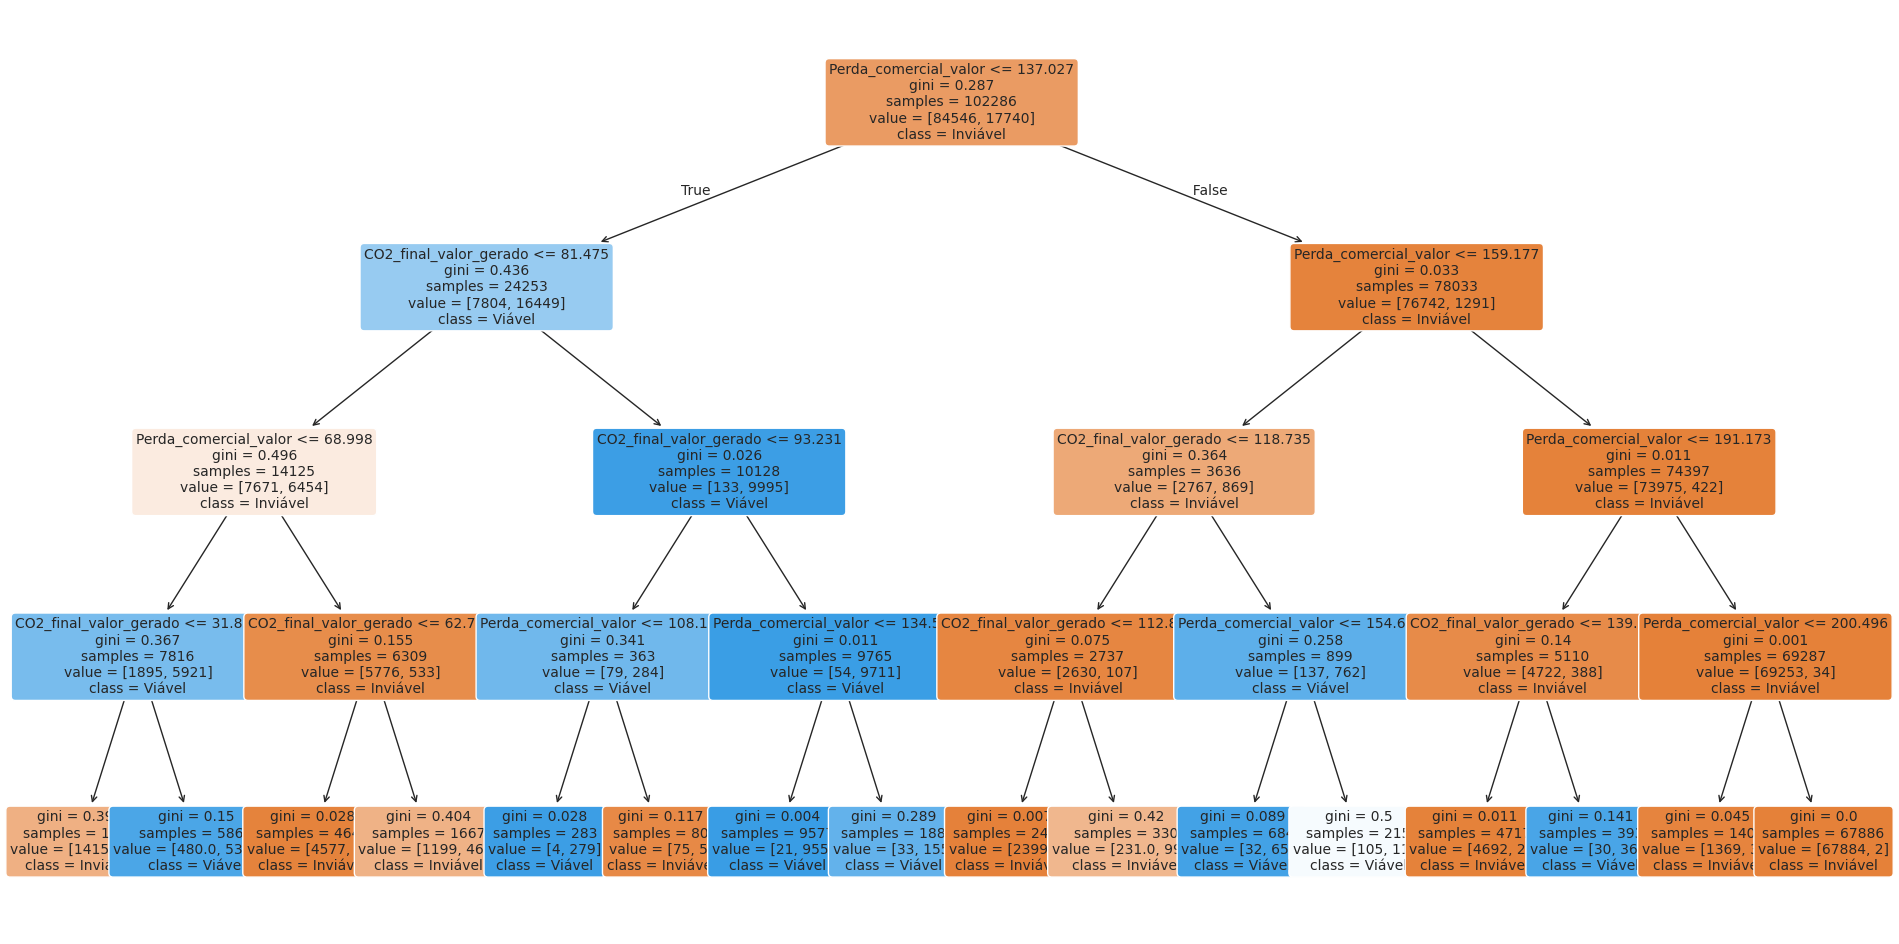

In [172]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Features e target
X = merged_final[["Peso Líquido", "Preço Unit.", "Perda_comercial_valor", "CO2_final_valor_gerado"]]
y = merged_final["Viavel"]

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Avaliação com cross-validation
tree_acc = np.mean(cross_val_score(tree_clf, X, y, cv=5))

# KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_acc = np.mean(cross_val_score(knn_clf, X, y, cv=5))

print("Acurácia média Decision Tree:", tree_acc)
print("Acurácia média KNN:", knn_acc)

# Visualizar árvore
plt.figure(figsize=(24,12))  # aumenta o tamanho da figura
plot_tree(tree_clf,
          feature_names=X.columns,
          class_names=["Inviável","Viável"],
          filled=True,
          fontsize=10,
          rounded=True)
plt.show()

In [177]:
merged_final["Viavel"] = (
    (merged_final["CO2_final_valor_gerado"] >= merged_final["Perda_comercial_valor"]) |
    (merged_final["CO2_final_valor_gerado"] >= 0.8 * merged_final["Perda_comercial_valor"])
).astype(int)


In [227]:

# Lista única de formatos e receitas
formatos = estoque_limpo["Formato"].unique()
receitas = rsu["Desc. Receita"].unique()

# Grid completo de combinações
combinacoes = pd.DataFrame(list(itertools.product(formatos, receitas)), columns=["Formato", "Desc. Receita"])

# Merge com os dados reais
full_data = combinacoes.merge(merged_final, on=["Formato", "Desc. Receita"], how="left")

# Preencher casos ausentes com valores padrão (simulação com 1000 kg)
full_data["Peso Líquido"] = full_data["Peso Líquido"].fillna(1000)
full_data["Perda_comercial_valor"] = full_data["Perda_comercial_valor"].fillna(
    (1000 * (full_data["Formato_util"]/full_data["Formato"])) - 1000
) * full_data["Preço Unit."].fillna(full_data["Preço Unit."].median())

full_data["CO2_final_valor_gerado"] = full_data["CO2_final_valor_gerado"].fillna(
    (1000/1000) * full_data["tCO2_ev"].fillna(1) * 65  # simula com 1 tonelada de crédito
)

# Recalcular viabilidade
full_data["Viavel"] = (
    (full_data["CO2_final_valor_gerado"] >= full_data["Perda_comercial_valor"]) |
    (full_data["CO2_final_valor_gerado"] >= 0.8 * full_data["Perda_comercial_valor"])
).astype(int)

# Criar tabela cruzada
pivot_viabilidade = full_data.pivot_table(
    index="Formato",
    columns="Desc. Receita",
    values="Viavel",
    aggfunc="mean",
    fill_value=0
)



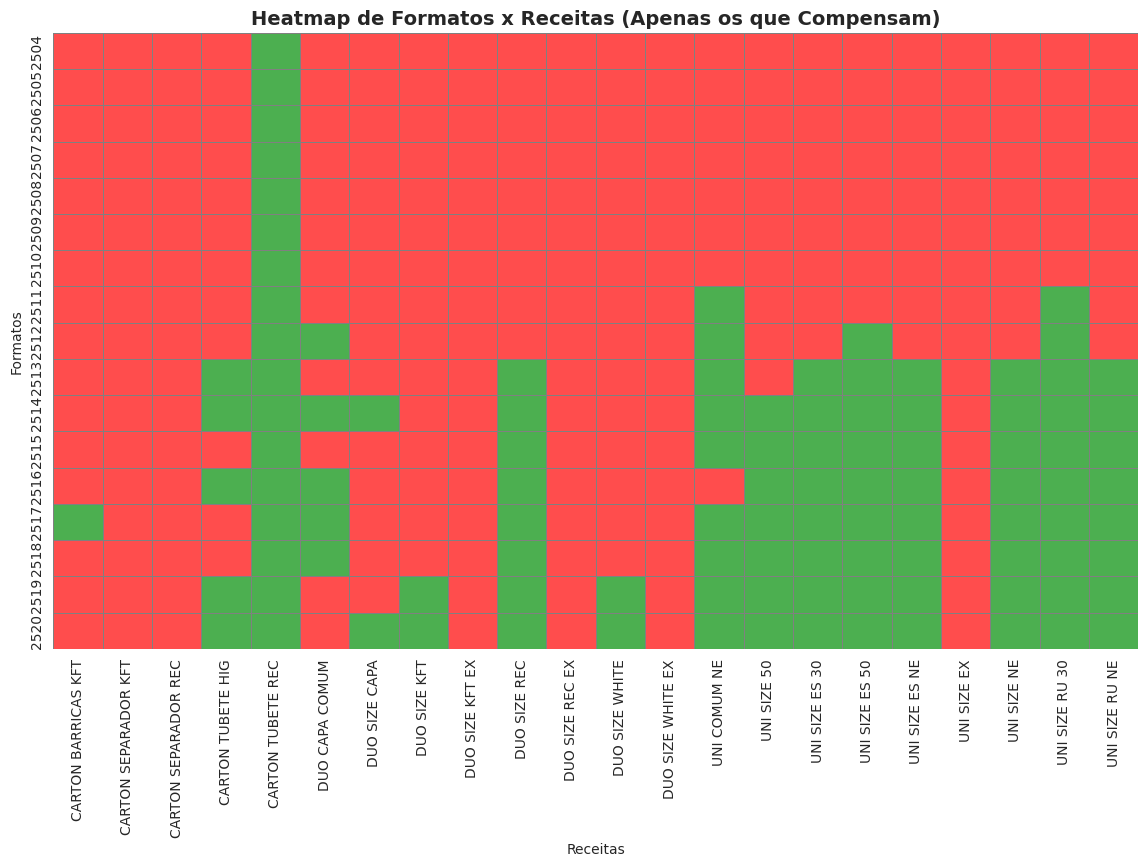

In [192]:

# Considera viável se a média for >= 0.8 (80% dos casos)
pivot_compensa = (pivot_viabilidade >= 0.8).astype(int)

# 🔎 Mantém só formatos que tenham pelo menos 1 receita viável
pivot_compensa = pivot_compensa.loc[pivot_compensa.sum(axis=1) > 0]

# Criar heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_compensa,
    cmap=["#ff4d4d", "#4CAF50"],  # vermelho = não compensa, verde = compensa
    cbar=False,
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Heatmap de Formatos x Receitas (Apenas os que Compensam)", fontsize=14, weight="bold")
plt.xlabel("Receitas")
plt.ylabel("Formatos")
plt.show()
